<a href="https://colab.research.google.com/github/santiagorodmon/ChallengeONEDataScience/blob/main/ChallengeONEDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [20]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



## Ingreso total por cada tienda

In [21]:
ingreso_total_tienda_1 = tienda['Precio'].sum()
ingreso_total_tienda_2 = tienda2['Precio'].sum()
ingreso_total_tienda_3 = tienda3['Precio'].sum()
ingreso_total_tienda_4 = tienda4['Precio'].sum()
print(f'El ingreso total de la tienda 1 es: ${ingreso_total_tienda_1:,.0f}')
print(f'El ingreso total de la tienda 2 es: ${ingreso_total_tienda_2:,.0f}')
print(f'El ingreso total de la tienda 3 es: ${ingreso_total_tienda_3:,.0f}')
print(f'El ingreso total de la tienda 4 es: ${ingreso_total_tienda_4:,.0f}')

El ingreso total de la tienda 1 es: $1,150,880,400
El ingreso total de la tienda 2 es: $1,116,343,500
El ingreso total de la tienda 3 es: $1,098,019,600
El ingreso total de la tienda 4 es: $1,038,375,700


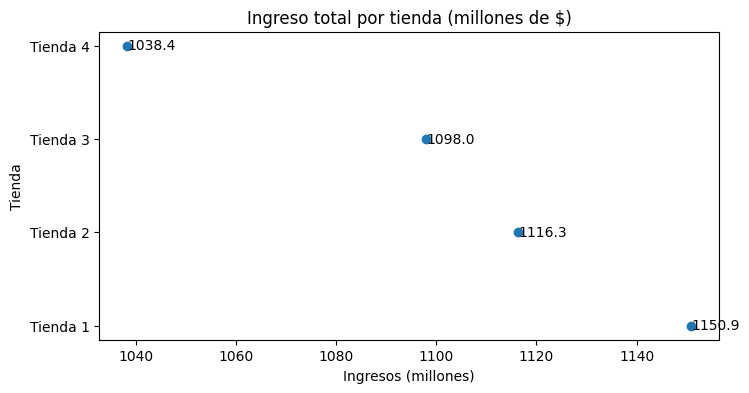

In [22]:
import matplotlib.pyplot as plt

tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
ingresos = [
    ingreso_total_tienda_1,
    ingreso_total_tienda_2,
    ingreso_total_tienda_3,
    ingreso_total_tienda_4
]

ingresos_m = [i / 1_000_000 for i in ingresos]

plt.figure(figsize=(8,4))
plt.scatter(ingresos_m, tiendas)

plt.title("Ingreso total por tienda (millones de $)")
plt.xlabel("Ingresos (millones)")
plt.ylabel("Tienda")

for x, y in zip(ingresos_m, tiendas):
    plt.text(x, y, f"{x:.1f}", va="center")

plt.show()


# 2. Ventas por categoría

In [23]:
suma_categoria_tienda1 = tienda.groupby("Categoría del Producto")["Precio"].sum()
suma_categoria_tienda2 = tienda2.groupby("Categoría del Producto")["Precio"].sum()
suma_categoria_tienda3 = tienda3.groupby("Categoría del Producto")["Precio"].sum()
suma_categoria_tienda4 = tienda4.groupby("Categoría del Producto")["Precio"].sum()

In [24]:
suma_categoria_tienda1

,Precio
Categoría del Producto,
Artículos para el hogar,12698400.0
Deportes y diversión,39290000.0
Electrodomésticos,363685200.0
Electrónicos,429493500.0
Instrumentos musicales,91299000.0
Juguetes,17995700.0
Libros,8784900.0
Muebles,187633700.0


In [25]:
suma_categoria_tienda2

,Precio
Categoría del Producto,
Artículos para el hogar,14746900.0
Deportes y diversión,34744500.0
Electrodomésticos,348567800.0
Electrónicos,410831100.0
Instrumentos musicales,104990300.0
Juguetes,15945400.0
Libros,10091200.0
Muebles,176426300.0


In [26]:
suma_categoria_tienda3

,Precio
Categoría del Producto,
Artículos para el hogar,15060000.0
Deportes y diversión,35593100.0
Electrodomésticos,329237900.0
Electrónicos,410775800.0
Instrumentos musicales,77380900.0
Juguetes,19401100.0
Libros,9498700.0
Muebles,201072100.0


In [27]:
suma_categoria_tienda4

,Precio
Categoría del Producto,
Artículos para el hogar,15074500.0
Deportes y diversión,33350100.0
Electrodomésticos,283260200.0
Electrónicos,409476100.0
Instrumentos musicales,75102400.0
Juguetes,20262200.0
Libros,9321300.0
Muebles,192528900.0


# 3. Calificación promedio de la tienda


In [28]:
valoracion_tienda1 = tienda['Calificación'].mean()
valoracion_tienda2 = tienda2['Calificación'].mean()
valoracion_tienda3 = tienda3['Calificación'].mean()
valoracion_tienda4 = tienda4['Calificación'].mean()

In [29]:
valoracion_tienda1

np.float64(3.976685036032217)

In [30]:
valoracion_tienda2

np.float64(4.037303942348453)

In [31]:
valoracion_tienda3

np.float64(4.048325561678677)

In [32]:
valoracion_tienda4

np.float64(3.9957591178965224)

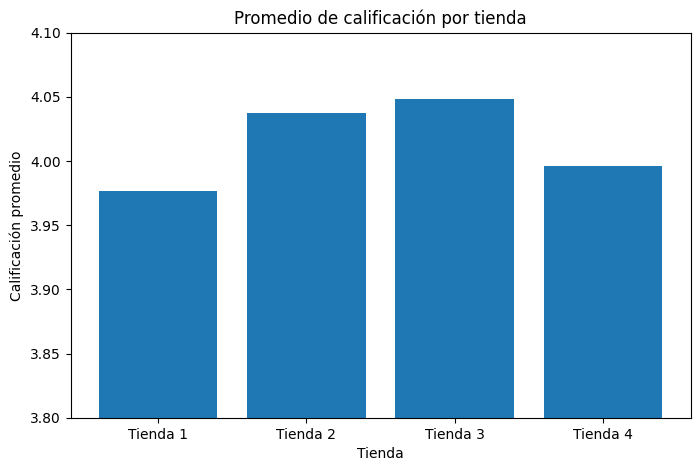

In [33]:
import matplotlib.pyplot as plt

tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
valoraciones = [
    valoracion_tienda1,
    valoracion_tienda2,
    valoracion_tienda3,
    valoracion_tienda4
]

plt.figure(figsize=(8,5))
plt.bar(tiendas, valoraciones)

plt.title("Promedio de calificación por tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación promedio")
plt.ylim(3.8, 4.1)

plt.show()

# 4. Productos más y menos vendidos

## Tienda 1

In [34]:
ventas_tienda1 = tienda.groupby("Producto").agg(
    Cantidad_Vendida=("Producto", "count"),
    Total_Ventas=("Precio", "sum")
).reset_index()

In [35]:
ventas_tienda1 = ventas_tienda1.sort_values(
    by="Cantidad_Vendida",
    ascending=False
)

### Top 3 productos mas vendidos Tienda 1

In [36]:
ventas_tienda1.head(3)

,Producto,Cantidad_Vendida,Total_Ventas
1,Armario,60,29462300.0
48,TV LED UHD 4K,60,142150200.0
33,Microondas,60,34761500.0


### Top 3 producto menos vendidos Tienda 1

In [37]:
ventas_tienda1.tail(3)

,Producto,Cantidad_Vendida,Total_Ventas
37,Olla de presión,35,2629300.0
13,Celular ABXY,33,32651000.0
4,Auriculares con micrófono,33,4730800.0


## Tienda 2

In [38]:
ventas_tienda2 = tienda2.groupby("Producto").agg(
    Cantidad_Vendida=("Producto", "count"),
    Total_Ventas=("Precio", "sum")
).reset_index()

In [39]:
ventas_tienda2 = ventas_tienda2.sort_values(
    by="Cantidad_Vendida",
    ascending=False
)

### Top 3 productos mas vendidos Tienda 2

In [40]:
ventas_tienda2.head(3)

,Producto,Cantidad_Vendida,Total_Ventas
24,Iniciando en programación,65,3127800.0
33,Microondas,62,36192000.0
7,Batería,61,46175300.0


### Top 3 producto menos vendidos Tienda 2

In [41]:
ventas_tienda2.tail(3)

,Producto,Cantidad_Vendida,Total_Ventas
23,Impresora,34,10385300.0
31,Mesa de comedor,34,8637500.0
26,Juego de mesa,32,5811900.0


## Tienda 3

In [42]:
ventas_tienda3 = tienda3.groupby("Producto").agg(
    Cantidad_Vendida=("Producto", "count"),
    Total_Ventas=("Precio", "sum")
).reset_index()

In [43]:
ventas_tienda3 = ventas_tienda3.sort_values(
    by="Cantidad_Vendida",
    ascending=False
)

### Top 3 productos mas vendidos Tienda 3

In [44]:
ventas_tienda3.head(3)

,Producto,Cantidad_Vendida,Total_Ventas
27,Kit de bancas,57,16699800.0
31,Mesa de comedor,56,14326100.0
11,Cama king,56,38834700.0


### Top 3 producto menos vendidos Tienda 3

In [45]:
ventas_tienda3.tail(3)

,Producto,Cantidad_Vendida,Total_Ventas
33,Microondas,36,19153600.0
42,Set de vasos,36,1210700.0
9,Bloques de construcción,35,1237200.0


## Tienda 4

In [46]:
ventas_tienda4 = tienda4.groupby("Producto").agg(
    Cantidad_Vendida=("Producto", "count"),
    Total_Ventas=("Precio", "sum")
).reset_index()

In [47]:
ventas_tienda4 = ventas_tienda4.sort_values(
    by="Cantidad_Vendida",
    ascending=False
)

### Top 3 productos mas vendidos Tienda 4

In [48]:
ventas_tienda4.head(3)

,Producto,Cantidad_Vendida,Total_Ventas
10,Cama box,62,32946300.0
15,Cubertería,59,2649300.0
11,Cama king,56,37555400.0


### Top 3 producto menos vendidos Tienda 4

In [49]:
ventas_tienda4.tail(3)

,Producto,Cantidad_Vendida,Total_Ventas
21,Guitarra acústica,37,11257100.0
1,Armario,34,16421400.0
22,Guitarra eléctrica,33,25823100.0


# 5. Envío promedio por tienda

In [50]:
promedio_envio_tienda1 = tienda['Costo de envío'].mean()
print(f'El promedio del valor de envio de la tienda 1 es: ${promedio_envio_tienda1:,.0f}')
promedio_envio_tienda2 = tienda2['Costo de envío'].mean()
print(f'El promedio del valor de envio de la tienda 2 es: ${promedio_envio_tienda2:,.0f}')
promedio_envio_tienda3 = tienda3['Costo de envío'].mean()
print(f'El promedio del valor de envio de la tienda 3 es: ${promedio_envio_tienda3:,.0f}')
promedio_envio_tienda4 = tienda4['Costo de envío'].mean()
print(f'El promedio del valor de envio de la tienda 4 es: ${promedio_envio_tienda4:,.0f}')

El promedio del valor de envio de la tienda 1 es: $26,019
El promedio del valor de envio de la tienda 2 es: $25,216
El promedio del valor de envio de la tienda 3 es: $24,806
El promedio del valor de envio de la tienda 4 es: $23,459


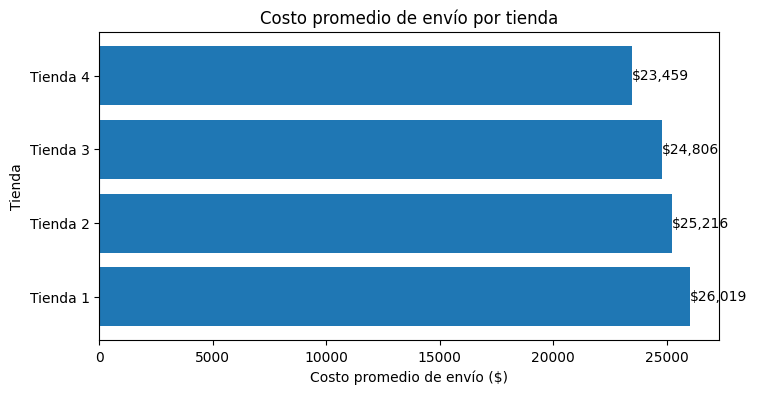

In [51]:
import matplotlib.pyplot as plt

tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
envios_promedio = [
    promedio_envio_tienda1,
    promedio_envio_tienda2,
    promedio_envio_tienda3,
    promedio_envio_tienda4
]

plt.figure(figsize=(8,4))
barras = plt.barh(tiendas, envios_promedio)

plt.title("Costo promedio de envío por tienda")
plt.xlabel("Costo promedio de envío ($)")
plt.ylabel("Tienda")

# Evitar notación científica
plt.ticklabel_format(style='plain', axis='x')

# Mostrar valores sobre cada barra
for barra in barras:
    ancho = barra.get_width()
    plt.text(
        ancho,
        barra.get_y() + barra.get_height()/2,
        f"${ancho:,.0f}",
        va="center"
    )

plt.show()
